<h1 style='color: #C9C9C9'>Machine Learning with Python<img style="float: right; margin-top: 0;" width="240" src="../../Images/cf-logo.png" /></h1> 
<p style='color: #C9C9C9'>&copy; Coding Fury 2022 - all rights reserved</p>

<hr style='color: #C9C9C9' />

# Simple Linear Regression

## What is Linear Regression? 

**Regression** is about finding the line of best fit through many points on a chart. 

When we use a **Linear Regression** alogorithm we're looking for the best **straight line** through the points. If the relationship between your data are not a straight line, you may need to use a different algorithm such as logistic regression or nonlinear regression. 

Linear Regression should be familar to you. You'll probably recall gathering data and plotting charts in GCSE Science experiments? You might have collected 10 readings in a double period, but by drawing a line of best fit you'd be able to infer what the data at other points might be. i.e. you'd be able to predict what other values might be along the line.

![Best Fit](../../Images/best-fit.png)

In Machine Learning, we refer to the data along the X axis as a "feature" and the data along the y axis as the "target variable".

In GCSE Science you'd have called the variable on the X axis the "independent variable", although we'll call it a feature. And, you'd have called the variable on the Y axis the "dependent variable", but we'll call it the "target variable". 

In essence, this means you were generally dealing with 2 columns of data at GCSE. 

As we progress through this course, you'll eventually use more complex data that has additional columns of data. 

In Machine Learning you can have as many columns of input data (features) as you like, but you can only have one output variable, i.e one target variable.

This tutorial focuses on **Simple Linear Regression** i.e. we'll find a straight line of best fit for 2 columns of data (one feature and a target variable). 

# Example Data - Happiness index

Money can't buy happiness? Right? 

In this example we're going to put this to the test, by loading data that compares yearly income to a happiness index.

> This example was created using data from an R tutorial that's available here:
> https://www.scribbr.com/statistics/simple-linear-regression/


## Load the data


In [1]:
import pandas as pd
happiness_df = pd.read_csv('../../Data/income_data.csv')
happiness_df

,income,happiness
0,38.63,2.314489
1,49.79,3.433490
2,49.24,4.599373
3,32.14,2.791114
4,71.96,5.596398
...,...,...
493,52.49,4.568705
494,34.72,2.535002
495,60.88,4.397451
496,34.41,2.070664


## Plot the data on a scatter to see if it's suitable for Linear Regression

<AxesSubplot:xlabel='income', ylabel='happiness'>

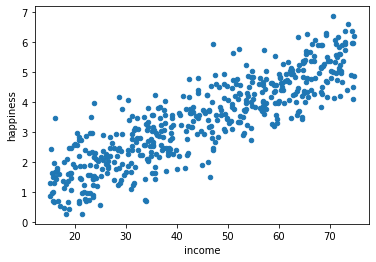

In [2]:
happiness_df.plot('income', 'happiness', kind='scatter')


According to the data there is a strong correlation between salary and happiness. 

While I'm not sure of the providence of this particular dataset there have been other studies that concur (see datasets on https://data.world). 

Nevertheless, this is a nice, simple dataset for your first attempt at linear regression. 

Let's see if we can get a line of best fit through the points. 

### Steps

Do you remember the four steps for machine learning with SciKit Learn? 

```
1. from sckitlearn.module import Model
2. model = Model()
3. model.fit(X,y)
4. predictions = model.predict(new_X) 
````
Note: the code above won't run but it does show the steps!

### Rules

Do you remember the rules of Machine Learning with SciKit Learn?

SciKit Learn requires:
1. numerical data
2. no missing data
3. a numpy array of data

Let's quickly test if our dataset meets these criteria.

### Checking the dataset for missing values and numberical data

In [3]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   income     498 non-null    float64
 1   happiness  498 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


Good Result!
* both columns contain numbers
* both columns are "non-null" (there are no empty cells in the table of data we imported)

Just remember to convert the dataframe columns to numpy arrays when passing them to the model.

## Training the Model 

### 1. Import the Model

In [4]:
from sklearn.linear_model import LinearRegression

### 2. Create a Linear Regression Model Object

In [5]:
model = LinearRegression()

### 3. Train the Model (i.e. fit the data to the model)

The code is ```model.fit(X,y)``` however there are a couple of things we need to do first. 

Remember - SciKit Learn requires:
1. numerical data
2. no missing data
3. a numpy array of data

In this case the data is all numerical, and doesn't have missing values. However, we do need to make it into a numpy array. 

#### 3.1 Getting the features - Method 1

In [16]:
X = happiness_df['income'].values  # get the values from the income column as a numpy array
X

array([38.63, 49.79, 49.24, 32.14, 71.96, 37.3 , 46.75, 44.98, 31.22,
       46.4 , 46.33, 27.73, 71.19, 74.67, 21.18, 25.59, 23.55, 23.88,
       47.56, 19.94, 73.11, 35.28, 24.29, 35.43, 52.27, 66.92, 39.  ,
       22.91, 23.81, 25.5 , 69.33, 18.56, 35.89, 68.26, 20.71, 52.24,
       22.43, 70.76, 41.91, 19.56, 50.62, 39.82, 30.65, 36.83, 37.89,
       53.59, 51.96, 52.41, 71.02, 34.24, 22.53, 53.7 , 62.26, 54.83,
       40.34, 65.1 , 60.29, 69.49, 71.95, 27.57, 69.56, 46.7 , 63.68,
       61.67, 60.74, 54.85, 15.9 , 16.8 , 55.  , 40.44, 50.05, 48.64,
       15.06, 28.65, 58.78, 64.84, 49.38, 56.25, 72.28, 53.37, 28.26,
       59.31, 35.2 , 32.4 , 34.98, 71.86, 47.19, 35.95, 32.34, 15.14,
       40.03, 61.98, 22.81, 21.9 , 34.34, 59.32, 53.08, 56.64, 74.39,
       21.35, 65.01, 36.51, 22.86, 47.49, 54.59, 34.33, 71.76, 55.06,
       30.98, 46.48, 18.28, 35.35, 46.06, 53.62, 68.79, 43.17, 33.83,
       49.32, 49.36, 26.02, 57.11, 61.18, 37.71, 71.17, 21.95, 59.52,
       39.22, 70.82,

In [17]:
type(X)

numpy.ndarray

In [18]:
# Let's check the shape of X
X.shape


(498,)

This tells us is that the shape of X is 498 items, and isn't organised into columns.

We need to reshape the feature data so that it's a single column with lots of rows. 



In [19]:
X = happiness_df['income'].values.reshape(-1,1)  
X

array([[38.63],
       [49.79],
       [49.24],
       [32.14],
       [71.96],
       [37.3 ],
       [46.75],
       [44.98],
       [31.22],
       [46.4 ],
       [46.33],
       [27.73],
       [71.19],
       [74.67],
       [21.18],
       [25.59],
       [23.55],
       [23.88],
       [47.56],
       [19.94],
       [73.11],
       [35.28],
       [24.29],
       [35.43],
       [52.27],
       [66.92],
       [39.  ],
       [22.91],
       [23.81],
       [25.5 ],
       [69.33],
       [18.56],
       [35.89],
       [68.26],
       [20.71],
       [52.24],
       [22.43],
       [70.76],
       [41.91],
       [19.56],
       [50.62],
       [39.82],
       [30.65],
       [36.83],
       [37.89],
       [53.59],
       [51.96],
       [52.41],
       [71.02],
       [34.24],
       [22.53],
       [53.7 ],
       [62.26],
       [54.83],
       [40.34],
       [65.1 ],
       [60.29],
       [69.49],
       [71.95],
       [27.57],
       [69.56],
       [46.7 ],
       [

#### 3.2 Getting the features from a dataframe with 1-column

It's worth noting that a single column of a table is a series

In [21]:
happiness_df['income']

0      38.63
1      49.79
2      49.24
3      32.14
4      71.96
       ...  
493    52.49
494    34.72
495    60.88
496    34.41
497    45.31
Name: income, Length: 498, dtype: float64

In [22]:
type(happiness_df['income'])

pandas.core.series.Series

In [23]:
happiness_df[['income']]

,income
0,38.63
1,49.79
2,49.24
3,32.14
4,71.96
...,...
493,52.49
494,34.72
495,60.88
496,34.41


In [24]:
type(happiness_df[['income']])

pandas.core.frame.DataFrame

In [25]:
X = happiness_df[['income']].values
X

array([[38.63],
       [49.79],
       [49.24],
       [32.14],
       [71.96],
       [37.3 ],
       [46.75],
       [44.98],
       [31.22],
       [46.4 ],
       [46.33],
       [27.73],
       [71.19],
       [74.67],
       [21.18],
       [25.59],
       [23.55],
       [23.88],
       [47.56],
       [19.94],
       [73.11],
       [35.28],
       [24.29],
       [35.43],
       [52.27],
       [66.92],
       [39.  ],
       [22.91],
       [23.81],
       [25.5 ],
       [69.33],
       [18.56],
       [35.89],
       [68.26],
       [20.71],
       [52.24],
       [22.43],
       [70.76],
       [41.91],
       [19.56],
       [50.62],
       [39.82],
       [30.65],
       [36.83],
       [37.89],
       [53.59],
       [51.96],
       [52.41],
       [71.02],
       [34.24],
       [22.53],
       [53.7 ],
       [62.26],
       [54.83],
       [40.34],
       [65.1 ],
       [60.29],
       [69.49],
       [71.95],
       [27.57],
       [69.56],
       [46.7 ],
       [

The target value (y) is expected to be a single column, so we don't have to reshape it

### 4. Get the Target Value as a Numpy Array

In [26]:
y = happiness_df['happiness'].values

In [27]:
model.fit(X,y)

LinearRegression()

### 5. Let's make predictions

Make predictions for the each of the following salaries: 
£20000
£40000
£60000 

Exercise
1. Modify the code below, to make the predictions one at a time (run the cell 3 times with different values)
2. Modify the code below to make all 3 predictions in one step (run the cell 1 time to make 3 predictions) 

In [34]:
import numpy as np

salary_in_thousands = [20 ,40, 60]
new_X = np.array(salary_in_thousands).reshape(-1,1)


In [35]:
model.predict(new_X)

array([1.63194858, 3.05957802, 4.48720746])

# Visualise the model & plot the line of best fit

**1) Let's visualise our data one more time**

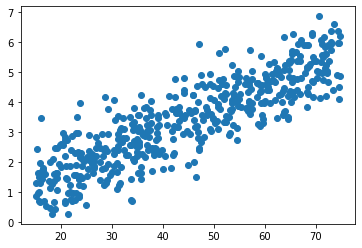

In [36]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

**2) Generate points along the lines of best fit by making predictions**

In [38]:
new_X = np.arange(1, 80).reshape(-1,1)
new_X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],

In [39]:
new_y = model.predict(new_X)

In [40]:
new_y

array([0.27570062, 0.34708209, 0.41846356, 0.48984503, 0.5612265 ,
       0.63260798, 0.70398945, 0.77537092, 0.84675239, 0.91813386,
       0.98951534, 1.06089681, 1.13227828, 1.20365975, 1.27504122,
       1.3464227 , 1.41780417, 1.48918564, 1.56056711, 1.63194858,
       1.70333006, 1.77471153, 1.846093  , 1.91747447, 1.98885594,
       2.06023742, 2.13161889, 2.20300036, 2.27438183, 2.3457633 ,
       2.41714478, 2.48852625, 2.55990772, 2.63128919, 2.70267066,
       2.77405214, 2.84543361, 2.91681508, 2.98819655, 3.05957802,
       3.1309595 , 3.20234097, 3.27372244, 3.34510391, 3.41648538,
       3.48786686, 3.55924833, 3.6306298 , 3.70201127, 3.77339274,
       3.84477422, 3.91615569, 3.98753716, 4.05891863, 4.1303001 ,
       4.20168158, 4.27306305, 4.34444452, 4.41582599, 4.48720746,
       4.55858894, 4.62997041, 4.70135188, 4.77273335, 4.84411482,
       4.9154963 , 4.98687777, 5.05825924, 5.12964071, 5.20102218,
       5.27240366, 5.34378513, 5.4151666 , 5.48654807, 5.55792

**3) make a new plot with the line of best fit overlayed**

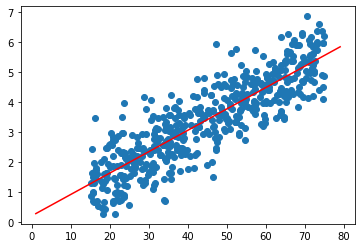

In [41]:
plt.clf() # clear previous plot from memory
plt.scatter(X, y)
plt.plot(new_X, new_y, color='red')
plt.show()

# Summary 

Linear Regression finds a line of best fit through your data.

This tutorial an example of Simple Linear Regression - with only 2 variables that can easily be plotted on an X and Y axis. 

At GCSE you'd have said that the data follows the pattern $ y=mx+c $, however, in Data Science we tend to write: 

$ y=ax+b $

In the next tutorial we'll look at Multiple Linear Regression, and learn how to deal with more columns of input data (i.e. more than one feature).


